In [1]:
# week 1

import tensorflow as tf


/home/lily/tf3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
x = tf.constant([2])
y = tf.constant([3])
z = tf.constant([7])
A = tf.constant([[3.0,3.0]])
B = tf.constant([[2.0],[2.0]])

sess = tf.Session()

res = sess.run(x*y+z)

product = sess.run(tf.matmul(A,B))

sess.close()

print(res)
print(product)


[13]
[[12.]]


### 1、监督学习，非监督学习，应用场景：
#### 监督学习： 
数据集的目标值有标注，也就是说输入数据和输出数据之间有对应的关系。数据集的关系是(x,y)。监督学习包括回归，分类。

监督学习的算法以及相关的应用场景：
> 高斯朴素贝叶斯（一般用于分类）：
  * 优点：可以处理连续数据，当数据符合高斯分布时，模型的效果好。当训练样本少或者是分布已知的情况下，能够学习联合分布的概率，来获得不错的预估。
  * 缺点：由于高斯朴素贝叶斯使用的是概率分布估计的方法，所以不是和大数据集，容易发生underfitting。所以，在数据集大或者是分布并不符合高斯分布情况下，表现不好。 
  
> 线性判别分析（分类）：降维的一种方法  
   降低数据的维度，通过把高维样本映射到低维空间中。如果分为两类可以投射到一维。
   * 优点：以标签，类别衡量差异性的有监督的降维方式，相对于PCA的模糊性，目地更加明确，更能反映样本间的差异。
   * 缺点： 局限性大，受样本种类限制，投影空间的维度最多为样本数量N-1维。
  
> 决策树：
  * 优点：模型容易解释。 
  * 缺点：不支持在线学习，针对新样本进入需要重新学习，容易过拟合。

> KNN：
  * 优点： 不需要进行参数估计，适合多分类的问题，在多分类问题有时表现比SVM（更适合二分类）好。
  * 缺点： 计算量大，需要计算预测样本与所有训练样本的距离。在有类的偏斜的情况下，容易出错。

> Adaboost：
   * 优点：能改变错误的权重，所以针对样本有调节能力，因而精度比较高。通过弱分类器来构建分类模型，通过弱回归模型来构建回归模型。不容易发生过拟合。   
   * 缺点： 对异常样本敏感， 异常样本在迭代中可能会获得较高的权重，影响最终预测的准确性。

> SVM：
   * 优点：由于可以使用核函数进行空间变换，所以在解决小样本、非线性以及高维模式识别有很多优势。而且SVM的泛化误差和支持向量数量有关，和转变的维度没有关系，所以，泛化能力比较好。
   * 缺点：计算复杂度比较高， 多分类问题准确性不够高。
   
> Logistic Regression
   * 优点：计算量小，易于实现，可以采用随机梯度下降实现。
   * 缺点：当特征空间较大，性能不佳;容易产生欠拟合，线性模型的准确度不够高。一般处理近似线性可分的问题。

> 神经网络：
   * 优点： 当数据的数量足够大，学习模型的准确性会比较高。
   * 缺点： 由于学习参数多，所以容易过拟合。计算量大。

有监督学习的学习步骤：
1、决定输入的数据范例的形态，收集训练资料。针对这个训练资料设计相关的输入特征。  
2、决定模型，也就是线性模型或者是非线性模型，模型策略，也就是学习的损失函数，以及模型的优化算法，例如随机梯度下降或者是Adam。  
3、模型实现，针对现有的模型调节参数，达到最优的学习的效果。  

应用场景：手写文字识别、声音处理、图像处理、垃圾邮件分类与拦截、网页检索、基因诊断及股票预测等。  
典型任务：预测数值型数据的回归、预测分类标签的分类、预测顺序的排序。

#### 无监督学习：    
目的是对原始资料进行分类，了解资料的内部结构。也就是计算机在互联网中自动收集信息，并从中获得有用的信息。 无监督学习不仅仅局限于解决像监督学习一样有明确答案的问题。

相关算法：  
> 异常检测： 
* 局部异常因子： 遵循预先制定的规则（偏离大部分正常值的数据认为是异常值），寻找异常值的无监督的异常检测算法。利用了KNN的算法类似，寻找第K近的值  
$$Rechability Distance： \quad RD_{k}(x,x^{'}) = max(||x-x^{(k)}||,||x-x^{'}||),x^{(k)}:距离x第k近的样本。$$
$$局部可达密度： \quad LRD_{k}(x) = ( \frac{1}{k}\sum_{i=1}^{k}RD_{k}(x^{(i)},x))^{-1}$$
$$局部异常因子: \quad LOF_{k} = \frac{\frac{1}{k}\sum_{i=1}^{k}LRD_{k}(x^{(i)})}{LRD_{k}(x)}$$
LOF值大，x就会被看为异常。
* 支持向量机的异常检测：
$$ min_{c,R,\xi} = [R^{2} + C\sum_{i = 1}^{n}\xi_{i}]$$
$$subject to \quad||x_{i} -c||^{2} <= R^{2} + \xi_{i}, \xi_{i} >=0 ,i = 1,2,...,n $$
* 基于密度比的异常检测： KL散度法检测。

> 无监督降维：
* PCA
* 局部投影保持（Locality Preserving Projections)
  将核函数利用到LPP当中，就是laplace特征映射。
  
> 聚类：
* KMeans: k值的选择困难，因为目标类别不定
* 谱聚类。

应用场景： 人造卫星故障诊断、视频分析、社交网站解析和声音信号解析，数据可视化等。  
典型任务：聚类、异常检测。

#### 半监督学习：  
利用少量的标注样本和大量为标注样本进行机器学习，从概率学习角度理解为利用训练样本的输入边缘概率P(x)和条件输出概率P(y|x)的联系设计具有良好性能的分类器。这种联系的存在是建立在假设的基础上的，如聚类假设和流形假设。

算法：
> transductive SVM（与inductive SVM相对，严格来说并不是半监督学习方法）：
*  强调一点，根据Vapnik的Statistical Learning Theory中提出统计学习中考虑两种不同类型的推理：归纳推理（Inductive inference）和转导推理(Transductive inference)．转导推理的目的是估计某一未知预测函数在给定兴趣点上的值（而不是在该函数的全部定义域上的值）．关键是，通过求解要求较低的问题，可以得到更精确的解．
* 传统的推理方法是归纳－演绎方法，人们首先根据用已有的信息定义一个一般规则，然后用这个规则来推断所需要的答案．也就是说，首先从特殊到一般，然后从一般到特殊．但是在转导模式中，我们进行直接的从特殊到特殊的推理，避免了推理中的不适定部分．
* inductive 是用训练和测试的数据来训练w，并把w用到测试集里面，也就是说总结出来一般的规律，然后将这种一般的规律用到特殊的情况（也就是新的范式当中）。Inductive 是用label points和unlabeled points一起来训练分类器的。  
* transductive 是先学习训练护具，然后用没有标注的数据来做test数据，也就是先用train数据训练出来一个classifier，然后用于test set， 如果test set靠近训练数据集，那么这个测试住居就会被标记为测试集的标注。
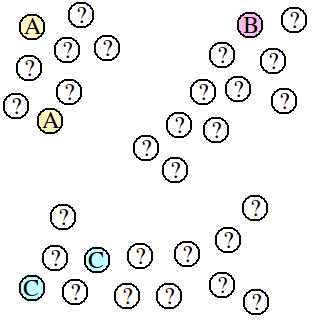
如上图所示，有颜色的是训练集，数目量小，可以通过KNN来将其他点标记为某个种类， transductive只是用于标记没有标记的数据，并没有很好的预测作用。
>> 算法流程(transductive)：
   * 首先用traning set来训练SVM
   * 调整参数C(如果C = 0，那么忽略没有标注的数据），最开始让C值很小。
   * 基于分类预测，为某些未标记的数据添加标签。
   * 缓慢增加C（松弛变量）
   * 继续标记没有标签的数据，并且重新训练这个分类器。（C应该是对模型可以误分类的约束。）
* 优点： 只需要少量的测试集就可以训练模型;训练的次数快，计算量空间占有率低。
* 缺点： 不能称为预测模型，只能呢个网对测试集进行分类， 因为没有训练出一个参数，所以每次有新的测试集进来，需要重新计算。

> co-training(协同训练）：在训练条件独立的情况下分别训练训练器，然后这些训练器对最终结果进行投票。但是协同训练的基本前提是：训练集是需要在Y的情况下独立，也就是conditional independence。 基于这个原因有新的算法： Co-random forest
* 主要算法步骤：
>> 输入：有标记的训练集合L， 没有标记的训练集合U：
   过程：在数据集U中随机抽取u个样本放入到创建的$U^{'}$当中：  
        循环K次：    
        利用L训练一个分类器$h_{1}$，只考虑x中$x_{1}$的比例  
        利用L训练一个分类器$h_{2}$，只考虑x中$x_{2}$的比例  
        让$h_{1}$从$U^{'}$标记p个正样本和n个负样本  
        让$h_{2}$从$U^{'}$标记p个正样本和n个负样本   
        将这些自己标记好的样本添加到L当中   
        随机从U中抽取2p+2n个样本放到$U^{'}$中
    * 其中$x_{1}$，$x_{2}$是训练集中的两个视图，也就是对训练集从两个不同的角度对其进行分类。这个方法要求就是这两个分类器的差异性。  
    
    得到最终的分类器$h_{1}$和$h_{2}$，然后对最终样本进行分类。
    
> co-forest:不容与Tri-Training，这个利用随机森林来保证各分类之间的差异性。随机森林是一个若干分类决策树的组合。它采用Bagging方法产生各异的训练集同时使用分类树作为元分类器。
>> Co-forest: 分类器：
（1） 训练n颗CART树，并且调整参数到最优。
（2） 对于每棵树：  
      加入unlabel的数据，选出在置信度区间theta里面数据并且加进树里面。  
      不断加入unlabel 数据，终止条件是这一次的迭代错误率大于上一次的就终止。  
（3）把放进unlabeldata 的数据重新再生成random forest。

> Label Propogation:基于图论的方法。利用所有的数据建立一个图，然后利用随机游走的理论来给label data附近的点一个初始的概率，用最小切分（min-cut）方法判断这个点是否属于label附近的点。类似于KNN的方法。

应用场景：只有少量的标签数据和大量的为标记的数据的情况下。

#### 强化学习： 
强化学习是针对没有标注数据集的情况而言的，但是在学习的过程当中能够从周围的环境中获取信息。

应用场景： 在机器人的自动控制、计算机游戏中的人工智能、市场战略的最优化等方面都有广泛的应用。
应用的算法： 回归，分类，聚类和降维。
    
### 2、做机器学习项目，有哪些环节？
1、针对问题的目的，做特征工程;    
2、选择合适的模型，以及模型的策略，也就是损失函数;  
3、模型的训练与评估;  
4、模型的应用。  
（数据准备，模型建立，测试与评估以及应用部署）。

### 3、深度学习，目前有哪些应用领域：
图像识别，自然语言处理，语音识别，以及预测建模这方面都有应用。

### 4、数据预处理，需要注意的地方：
1、特征数据的有偏性，一般可以通过box-cox转换;在分类问题中，最终的样本是否有偏。  
2、特征的共线性，也就是相关性。    
3、数据中的异常值。  
4、数据缺失值的处理。  
5、是否需要对数据做离散化的处理。  
6、特征向量的输入形式。  
7、特征维度的处理。  

### 5、 tensorflow运行原理当中，架构有哪些核心点：
1、 graph：用图的连接，来表示数据的传递以及数据的计算。  
2、 tensor：利用tensor来表达任何的数据。  
3、 variable：通过变量来维护状态，通过placeholder可以为表量保留位置。  
4、 session： 在session执行之前，所有的变量都只是operation而不是一个变量值。  所以图的计算需要在session中运行。在运行图之前，必须对所有的变量进行初始化。  
5、 summary：通过这个功能来对模型进行记录。  
6、 estimator： 定义需要训练的模型的结构。  

### 6、学习过程中的知识点和收获记录：
重新查看了半监督学习的概念，一直没有动手时间，理论知识无法获得很好的补充。实现了简单的tensorflow的计算。明天需要亲自动手实现一个tensorflow的小程序。

